# Régression linéaire à une variable - Exercices tirés du MOOC d'Andrew Ng

## Chargement des données

### Charger les données du fichier ex1data1.csv

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("ex1data1.csv")

### Visualiser les données

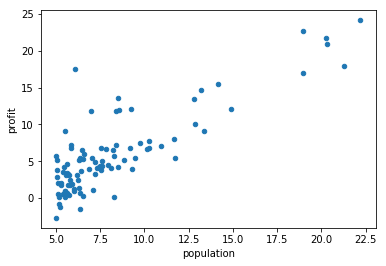

In [3]:
%matplotlib inline
data.plot.scatter('population', 'profit')

### Découpez vos données en deux vecteurs X et y et transformerz-les en array numpy

Note: Les colonnes d'un Dataframe peuvent être sélectionnées par leur nom, de la même manière que dans un dictionnaire

In [4]:
X = data["population"].values
y = data["profit"].values

## Calcul d'une première prédiction

### Initialisez theta en un vecteur de deux valeurs à zéro

In [5]:
theta = np.zeros(2)

### Écrivez une fonction _predict_ qui prend en argument une population (x) ainsi que les parametres theta et prédit le profit (y) associé

In [6]:
def predict(X, theta):
    return theta[0] + (theta[1] * X)

### Écrivez une fonction _fit_ qui prend en arguments le vecteur X et le vecteur y des données d'entraînement et renvoie le vecteur de paramètres _theta_ qui a été appris

In [7]:
def fit(X, y, theta, alpha, num_iters):
    # Initialiser certaines variable utiles
    m = X.size
    tmp_theta = np.zeros(2)
    # Boucler sur le nombre d'itérations
    for i in range(num_iters):
        tmp_theta[0] = theta[0] - ((alpha / m) * sum(predict(X[j], theta) - y[j] for j in range(m)))
        tmp_theta[1] = theta[1] - ((alpha / m) * sum((predict(X[j], theta) - y[j]) * X[j] for j in range(m)))
        theta = tmp_theta        

    return theta

### Lancez l'apprentissage en appelant la fonction _fit_ et en prenant bien soin de récupérer le résultat de *theta* à la fin!! Vous devriez obtenir des valeurs autour de [-3.6303, 1.1664]

Pour commencer, on fixera alpha à 0.01 et num_iters à 1500

In [8]:
theta = fit(X, y, theta, 0.01, 1500)
theta

array([-3.63609474,  1.16699229])

## Visualiser la droite de régression

### Voici une fonction pour visualiser votre droite de régression (cadeau!) Vous pourrez l'appeler plus loin dans l'exercice

In [9]:
import matplotlib.pyplot as plt

def visualize(theta):
    fig = plt.figure()
    ax = plt.axes()
    ax.set_xlim([4.5,22.5])
    ax.set_ylim([-5, 25])
    ax.scatter(X, y)
    line_x = np.linspace(0,22.5, 20)
    line_y = theta[0] + line_x * theta[1]
    ax.plot(line_x, line_y)
    plt.show()

### Appelez la fonction pour visualiser la droite avec différentes valeurs de theta

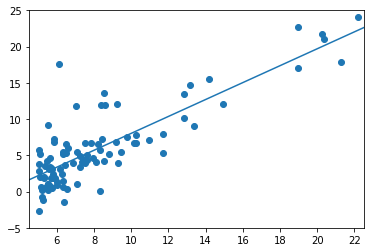

In [10]:
visualize(theta)

## Fonction de coût

Maintenant voyons comment resserrer notre analyse de l'algorithme et calculons le coût (ou la perte, ou l'erreur) à chaque itération.

### Définissez la fonction de coût de votre modèle

In [11]:
def cost(X, y, theta):
    m = X.size
    return (1/(2 * m)) * sum((predict(X[j], theta) - y[j]) ** 2 for j in range(m))

### Testez-la avec theta = [0,0]   Vous devriez obtenir environ 32.07

In [12]:
theta = np.zeros(2)
cost(X, y, theta)

32.072733877455654

### Maintenant avec theta = [-1,2]. Vous devriez obtenir environ 54.24

In [13]:
theta = [-1, 2]
cost(X, y, theta)

54.242455082012377

### Copiez le code de votre fonction _fit_ et ajoutez-y un appel à la fonction _cost_, à chaque itération. Vous stockerez vos résultats dans une liste nommée J_history, que vous retournerez avec *theta* à la fin de la fonction

Et oui, en Python, une fonction peut retourner plus qu'une variable!!

In [14]:
def fit_with_cost(X, y, theta, alpha, num_iters):
    m = X.size
    tmp_theta = np.zeros(2)
    J_history = []
    for i in range(num_iters):
        tmp_theta[0] = theta[0] - ((alpha / m) * sum(predict(X[j], theta) - y[j] for j in range(m)))
        tmp_theta[1] = theta[1] - ((alpha / m) * sum((predict(X[j], theta) - y[j]) * X[j] for j in range(m)))
        theta = tmp_theta        
        J_history.append(cost(X, y, theta))

    return theta, J_history

### Appelez la fonction en récupérant les valeurs de theta et J_history

In [15]:
# D'abord on réinitialise theta à zéro
theta = np.zeros(2)

In [16]:
# Lancez l'entraînement avec votre nouvelle fonction
fit_theta, J_history = fit_with_cost(X, y, theta, 0.001, 150)

### On visualise maintenant l'évolution du coût en fonction du nombre d'itérations

Vous pouvez voir si en modifiant les valeurs d'alpha et de num_iters, le graphique change d'allure

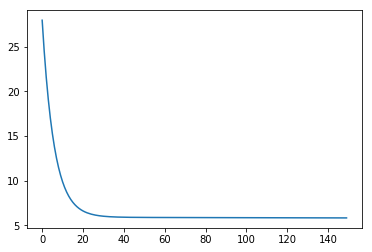

In [17]:
fit = plt.figure()
ax = plt.axes()
ax.plot(J_history)